In [1]:
%reset -f
%load_ext autoreload
%autoreload 2
%matplotlib inline

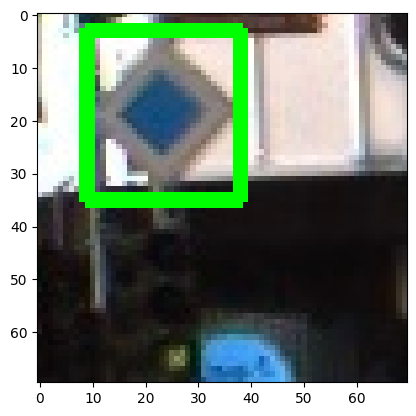

In [2]:
import cv2
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

pascal_yolo = 'pascal'

def read_pascal_voc_and_plot(image_path, annotations_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to read the image.")
        return

    # Read the Pascal VOC annotations from the XML file
    tree = ET.parse(annotations_path)
    root = tree.getroot()

    annotations = []
    for obj in root.findall('object'):
        label = obj.find('name').text
        bbox = obj.find('bndbox')
        x_min = int(bbox.find('xmin').text)
        y_min = int(bbox.find('ymin').text)
        x_max = int(bbox.find('xmax').text)
        y_max = int(bbox.find('ymax').text)

        annotations.append((label, x_min, y_min, x_max, y_max))

    # Plot the image with bounding boxes
    for label, x_min, y_min, x_max, y_max in annotations:
        color = (0, 255, 0)  # Green color for bounding boxes
        thickness = 2
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)
        cv2.putText(image, label, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    plt.imshow(image)
    plt.show()

def read_and_plot_yolo_annotations(image_path, annotations_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to read the image.")
        return
    
    # Read the YOLO annotations from the file
    with open(annotations_path, 'r') as f:
        lines = f.readlines()

    annotations = []
    for line in lines:
        line = line.strip().split()
        label = line[0]
        x_center = float(line[1])
        y_center = float(line[2])
        width = float(line[3])
        height = float(line[4])

        # Calculate the coordinates of the bounding box
        x_min = int((x_center - width / 2) * image.shape[1])
        y_min = int((y_center - height / 2) * image.shape[0])
        x_max = int((x_center + width / 2) * image.shape[1])
        y_max = int((y_center + height / 2) * image.shape[0])

        annotations.append((label, x_min, y_min, x_max, y_max))

    # Plot the image with bounding boxes
    for label, x_min, y_min, x_max, y_max in annotations:
        color = (0, 255, 0)  # Green color for bounding boxes
        thickness = 2
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)
        cv2.putText(image, label, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    plt.imshow(image)
    plt.show()

images = os.listdir('../output/images')
image_path = os.path.join('../output/images', random.choice(images))

plt.figure()
if pascal_yolo == 'yolo':
    annotations_path = image_path.replace('images','annotations').replace('jpg','txt')
    assert os.path.isfile(annotations_path), "File not found. Check if pascal_voc is set correctly."
    read_and_plot_yolo_annotations(image_path, annotations_path)
elif pascal_yolo == 'pascal':
    annotations_path = image_path.replace('images','annotations').replace('jpg','xml')
    assert os.path.isfile(annotations_path), "File not found. Check if pascal_voc is set correctly."
    read_pascal_voc_and_plot(image_path, annotations_path)
else:
    raise ValueError("Wrong value for pascal_yolo")